# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems

A classification is were you try to classify something as one or another. There is a few types of classifications:
* Binaryy classification
* Multiclass classification
* Multilabel classification

In [28]:
import tensorflow as tf
import pandas as pd
import numpy as np

## Creting data to view and fit

In [2]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [3]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
# Check the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

Our data is a little hard to understand right now... let's visualize it!

In [5]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label": y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


Our data is a little hard to understand right now... let's visualize it

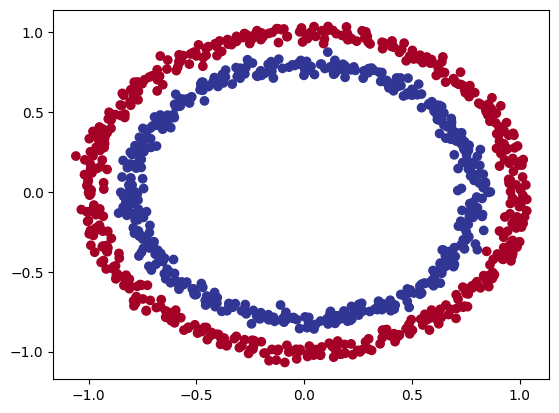

In [6]:
# Visualize with a plot
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

## Input and output shapes of our neural network

In [7]:
# Check sgapes of our features and labels

X.shape, y.shape

((1000, 2), (1000,))

In [8]:
# How many samples we're working with
len(X), len(y)

(1000, 1000)

In [9]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modeling

The steps in modelling with Tensorflow are typically:
1. Create or import model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate

In [10]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 943us/step - accuracy: 0.4479 - loss: 3.1517 
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - accuracy: 0.5230 - loss: 0.7168
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - accuracy: 0.5247 - loss: 0.6963
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - accuracy: 0.5261 - loss: 0.6925
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - accuracy: 0.5185 - loss: 0.6924


In [11]:
# Let's try and improve our model by traning for longer...
model_1.fit(X, y, epochs=200, verbose=0)

In [12]:
model_1.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - accuracy: 0.4852 - loss: 0.6927


[0.6932879686355591, 0.4729999899864197]

Since we're working on a binary classification problem and our model is getting around - 50% accuracy... it's performing as if it's guessing

So let's step things up a notch and add an extra layer.

In [13]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4830 - loss: 2.1335   
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - accuracy: 0.4502 - loss: 0.7075
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - accuracy: 0.4335 - loss: 0.6961
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - accuracy: 0.4547 - loss: 0.6946
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.4379 - loss: 0.6945
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - accuracy: 0.4422 - loss: 0.6945
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step - accuracy: 0.4365 - loss: 0.6945
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - accuracy: 0.4444 - loss: 0.6945
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - accuracy: 0.4478 - loss: 0.6945
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - accuracy: 0.4478 - loss: 0.6945
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - accuracy: 0.4483 - loss: 0.6945
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 

In [14]:
#Evaluate the model
model_2.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4138 - loss: 0.6927  


[0.6934240460395813, 0.4259999990463257]

## Improving our model

Let's look into our bag of tricks to see how we can improve our model. 

1. Create a model - we might to add more layers or increase the number of hidden units within a layer.
2. Compile a model - here we might to choose a different optimization functions such as Adam instead of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs.

In [15]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [16]:
model_3.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5112 - loss: 0.6922  


[0.6972782015800476, 0.492000013589859]

To visualize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:
* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [17]:
import numpy as np

In [14]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [15]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3, X=X, y=y)

NameError: name 'model_3' is not defined

In [ ]:
# Let's see if our model can be used for a refression problem...

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

# Let's spleet our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to te regression data
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), # <- expand input dimensions
            y_reg_train,
            epochs=100)

Oh wait... we compiled our model for a binary classification problem.

But... we're now working on a regression problem, let's change the model to suit our data

In [27]:
# Setup the random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model, this time with a regression-specific loss function
model_3.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['mae'])

# 3 Fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), # <- expand input dimensions
            y_reg_train,
            epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 504.7383 - mae: 504.7383  
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 379.0524 - mae: 379.0524 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 251.3954 - mae: 251.3954 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 119.6182 - mae: 119.6182 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 53.6334 - mae: 53.6334 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 89.2726 - mae: 89.2726 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 69.2097 - mae: 69.2097 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 43.1894 - mae: 43.1894 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 50.6030 - mae: 50.6030 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 41.0659 - mae: 41.0659 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 44.9395 - mae: 44.9395 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 40.5080 - mae: 40.5080 
Epoch 13/100
5/5

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


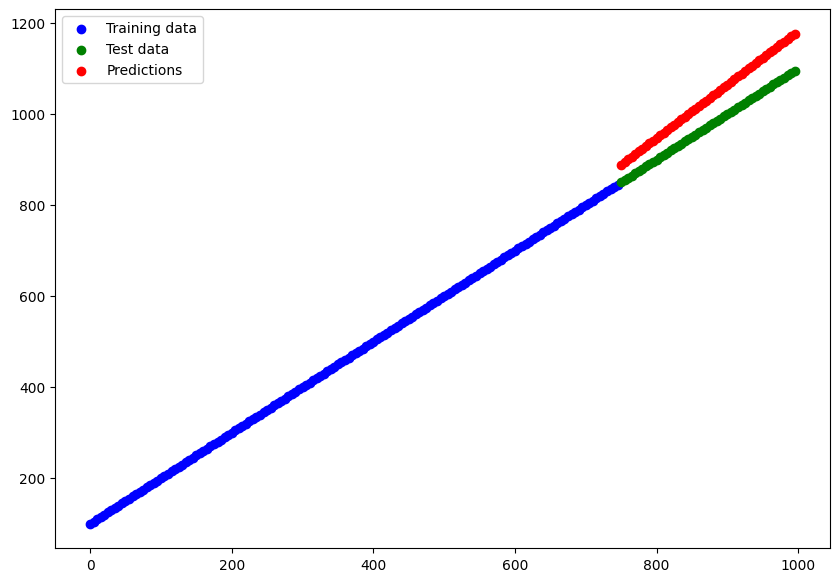

In [30]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

# The missing piece: Non-linearity

In [35]:
# Setup the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=['accuracy'])

# 3 Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5196 - loss: 6.3958   
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - accuracy: 0.5195 - loss: 6.3866
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - accuracy: 0.5195 - loss: 6.3857
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - accuracy: 0.5195 - loss: 6.3856
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - accuracy: 0.5195 - loss: 6.3850
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - accuracy: 0.5195 - loss: 6.3838
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - accuracy: 0.5195 - loss: 6.3953
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - accuracy: 0.5220 - loss: 6.3982
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - accuracy: 0.5220 - loss: 6.3903
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - accuracy: 0.5195 - loss: 6.3894
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5195 - loss: 6.3891 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0

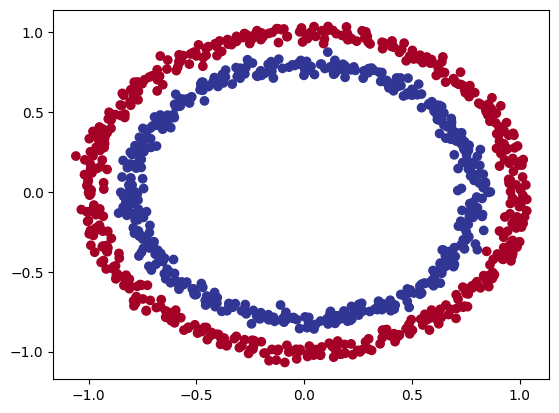

In [36]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step
doing binary classifcation...


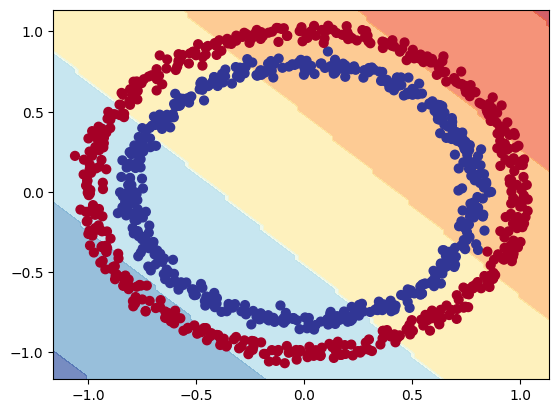

In [38]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4, X=X, y=y);

Let's try build our first neural network with a non-linear activation function

In [39]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu")
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4021 - loss: 4.8244
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - accuracy: 0.4123 - loss: 4.7077
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - accuracy: 0.4220 - loss: 4.6230
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - accuracy: 0.4343 - loss: 4.5765
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4377 - loss: 4.4562 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - accuracy: 0.4496 - loss: 4.3593
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4483 - loss: 4.3401 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4526 - loss: 4.2236 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - accuracy: 0.4549 - loss: 4.1027
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - accuracy: 0.4535 - loss: 4.0906
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - accuracy: 0.4582 - loss: 4.0833
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 931

In [44]:
# Time to replicatethe multi-layer neural network from Tensorflow playground to code
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_6.fit(X, y, epochs=200)

Epoch 1/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4901 - loss: 3.7099   
Epoch 2/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4559 - loss: 3.1217 
Epoch 3/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4161 - loss: 1.9687 
Epoch 4/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4268 - loss: 1.7732 
Epoch 5/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4463 - loss: 1.0430 
Epoch 6/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4397 - loss: 0.9860 
Epoch 7/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4345 - loss: 0.9618 
Epoch 8/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4296 - loss: 0.9446 
Epoch 9/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4203 - loss: 0.9304 
Epoch 10/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - accuracy: 0.4249 - loss: 0.9180
Epoch 11/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - accuracy: 0.4192 - loss: 0.9069
Epoch 12/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/s

In [45]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - accuracy: 0.9781 - loss: 0.1288


[0.1321811079978943, 0.9769999980926514]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step
doing binary classifcation...


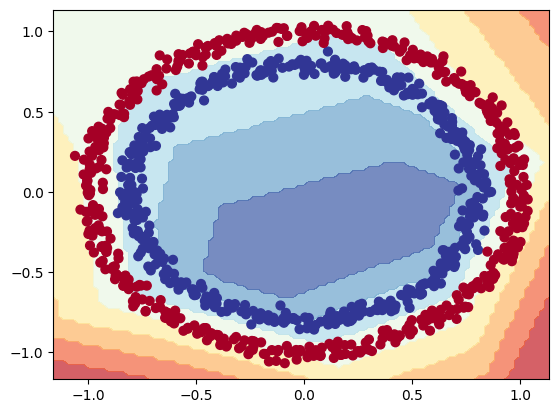

In [47]:
# How do our model predictions look?
plot_decision_boundary(model_6, X, y);

In [49]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid),
])

# 2. Compile the model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5234 - loss: 0.7334   
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5089 - loss: 0.7187 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - accuracy: 0.4847 - loss: 0.7117
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - accuracy: 0.4847 - loss: 0.7085
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - accuracy: 0.4778 - loss: 0.7069
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4700 - loss: 0.7062 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - accuracy: 0.4419 - loss: 0.7055
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - accuracy: 0.4388 - loss: 0.7048
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4407 - loss: 0.7041 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4378 - loss: 0.7033 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4378 - loss: 0.7022 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1m

In [50]:
# 4. Evaluate the model
model_7.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - accuracy: 0.9169 - loss: 0.5046


[0.4959062933921814, 0.9259999990463257]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step
doing binary classifcation...


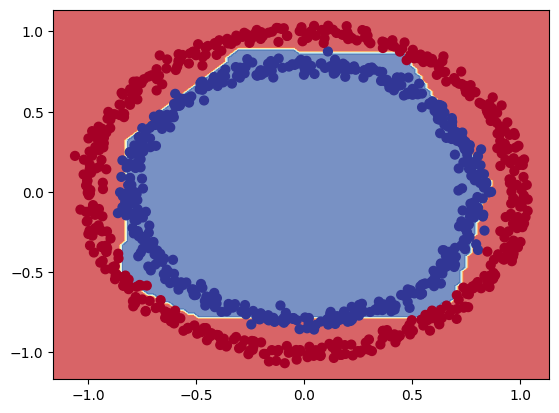

In [53]:
# Let's visualize our incredible metrics
plot_decision_boundary(model_7, X, y);

**Question:** What's wrong the predictions we've made? Are we really evaluating our model correctly? Hint: what data did the model learn on and what data did we predict on?

**Note:** The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

Now we've discussed the concept of linear and non-linear functions (or lines), let's see them in action.

In [54]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

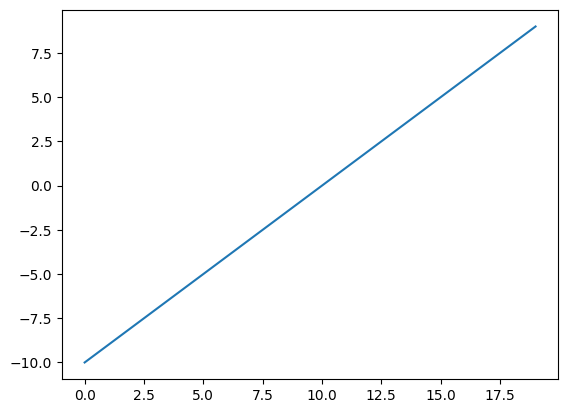

In [56]:
# Visualize our toy tensor
plt.plot(A);

In [57]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))

def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

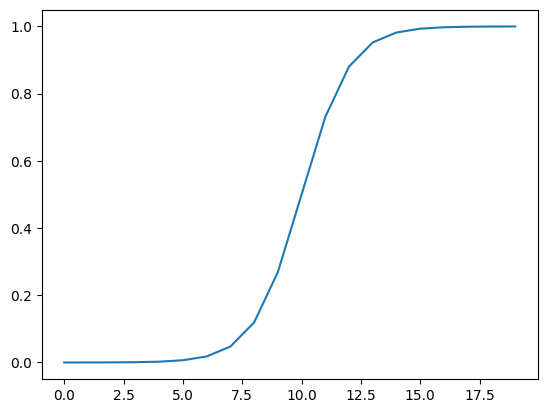

In [58]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A));

In [59]:
# Let's recreate the relu function
def relu(x):
    return tf.maximum(0, x)

# Pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

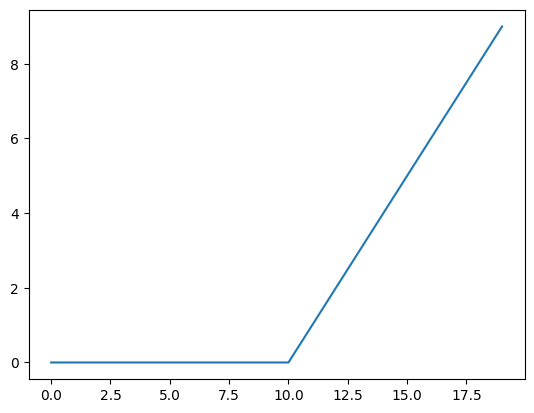

In [60]:
# Plot ReLU-modified tensor
plt.plot(relu(A))

In [61]:
# Let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

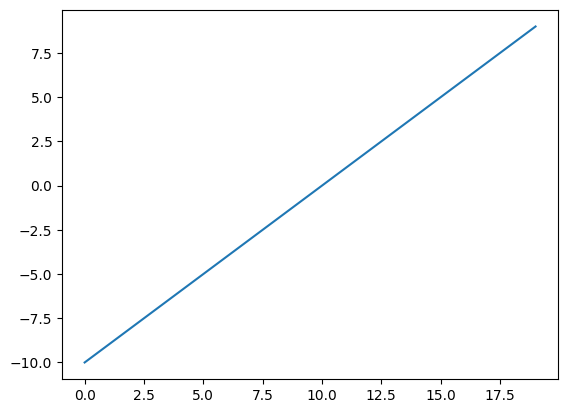

In [62]:
# Does the linear activation function change anything?
plt.plot(tf.keras.activations.linear(A));

In [63]:
# Does even A change?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classification model

So far we've been training and testing on the same dataset...

However, in machine learning this is basically a sin.

So let's create a training and test set.

In [29]:
# Check how many examples we have 
len(X)

1000

In [30]:
# Split into train and test sets

X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, y_train.shape

((800, 2), (800,))

In [31]:
# Let's recreate a model to fit on the training data and evaluate on the testing data

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_7)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# 2. Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 3. Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5035 - loss: 0.6951   
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - accuracy: 0.5332 - loss: 0.6859
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5434 - loss: 0.6790 
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - accuracy: 0.5953 - loss: 0.6728
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6186 - loss: 0.6628 
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - accuracy: 0.6132 - loss: 0.6515
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - accuracy: 0.6241 - loss: 0.6378
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6255 - loss: 0.6277 
Epoch 9/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6386 - loss: 0.6164 
Epoch 10/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - accuracy: 0.6552 - loss: 0.6032
Epoch 11/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - accuracy: 0.6781 - loss: 0.5898
Epoch 12/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step -

In [32]:
# 4. Evaluate the model on the test data
model_8.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9383 - loss: 0.2872 


[0.2888389527797699, 0.9350000023841858]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step
doing binary classifcation...
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step
doing binary classifcation...


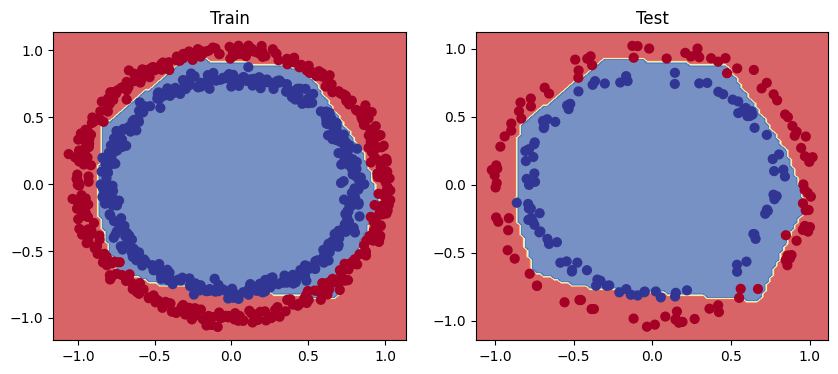

In [33]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train);
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test);

## Plot the loss (or training) curves

In [34]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

,accuracy,loss
0,0.50500,0.697161
1,0.51875,0.686598
2,0.53750,0.680337
3,0.58500,0.672465
4,0.61375,0.661641
5,0.62375,0.649385
6,0.63500,0.635694
7,0.63625,0.624699
8,0.65125,0.612426
9,0.67000,0.599098


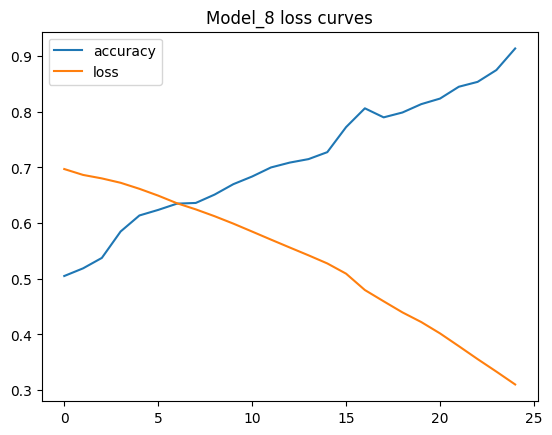

In [35]:
# Plot the loss curves
pd.DataFrame(history.history).plot();
plt.title("Model_8 loss curves");

**Note:** For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels)

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to you model *while* its training.
* Another model (we could use the same one as above, but we're practicing building models here)
* A modified loss curves plot.

In [38]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

# Compile the model
model_9.compile(
    loss='binary_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model (passing lr_scheduler callback)
history_9 = model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5079 - loss: 0.6949 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5106 - loss: 0.6947 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5138 - loss: 0.6946 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - accuracy: 0.5052 - loss: 0.6944 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5068 - loss: 0.6942 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5083 - loss: 0.6940 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5071 - loss: 0.6938 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5041 - loss: 0.6936 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5044 - loss: 0.6934 - learnin

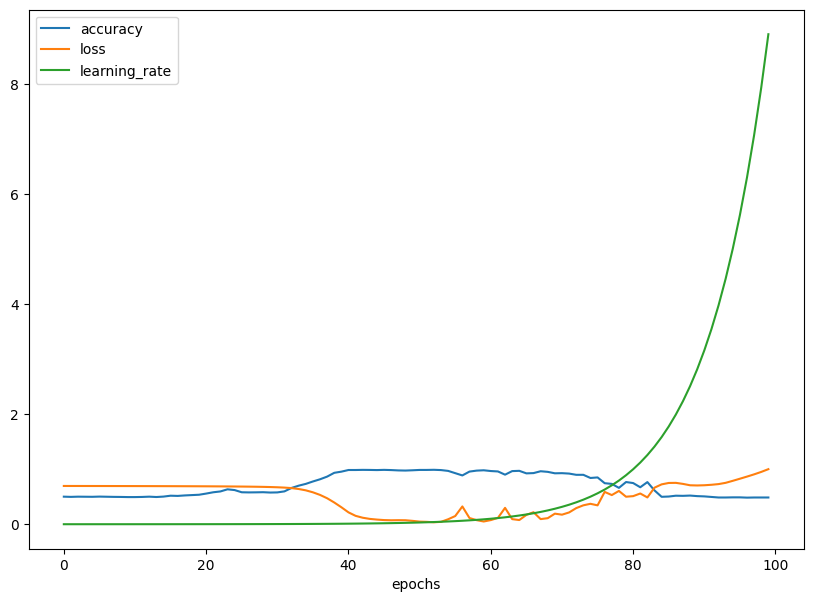

In [40]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs");

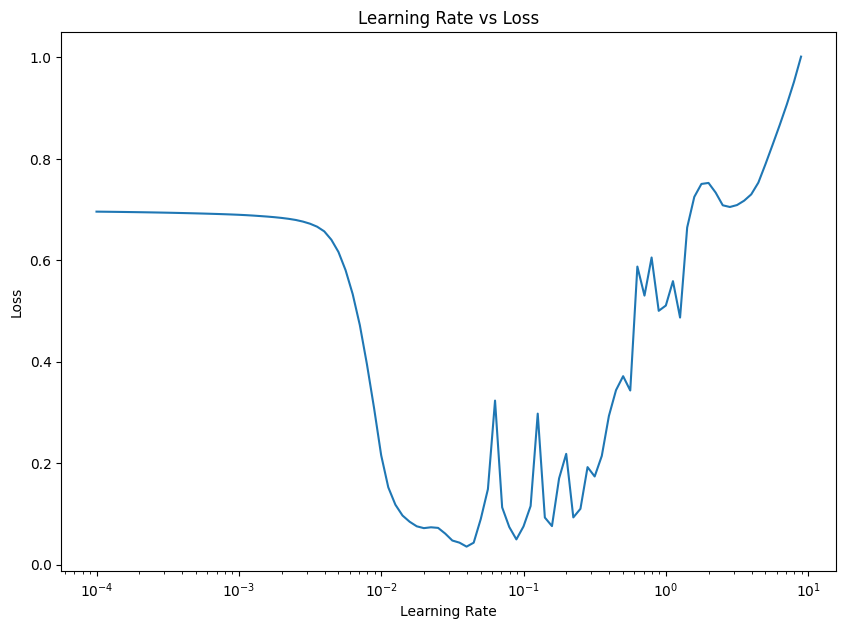

In [43]:
# Plot the learning rate versus the loss

lrs = 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"]);
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")
plt.show();

In [44]:
# Let's try using a higher *ideal* learning rate with the same model as before
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

# Compile the model
model_10.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
    metrics=['accuracy']
)

# Fit the model for 20 epochs
history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5495 - loss: 0.6857
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6592 - loss: 0.6643 
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7415 - loss: 0.6288 
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8307 - loss: 0.5601 
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8629 - loss: 0.4526 
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9219 - loss: 0.3475 
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9572 - loss: 0.2591 
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9770 - loss: 0.1850 
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9785 - loss: 0.1389 
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9831 - loss: 0.1094 
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9889 - loss: 0.0877 
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0

In [45]:
# Evaluate model 10 on the test datasets
model_10.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0216  


[0.021903999149799347, 1.0]

In [46]:
# Evaluate model 8 on the test datasets
model_8.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9383 - loss: 0.2872 


[0.2888389527797699, 0.9350000023841858]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step
doing binary classifcation...
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step
doing binary classifcation...


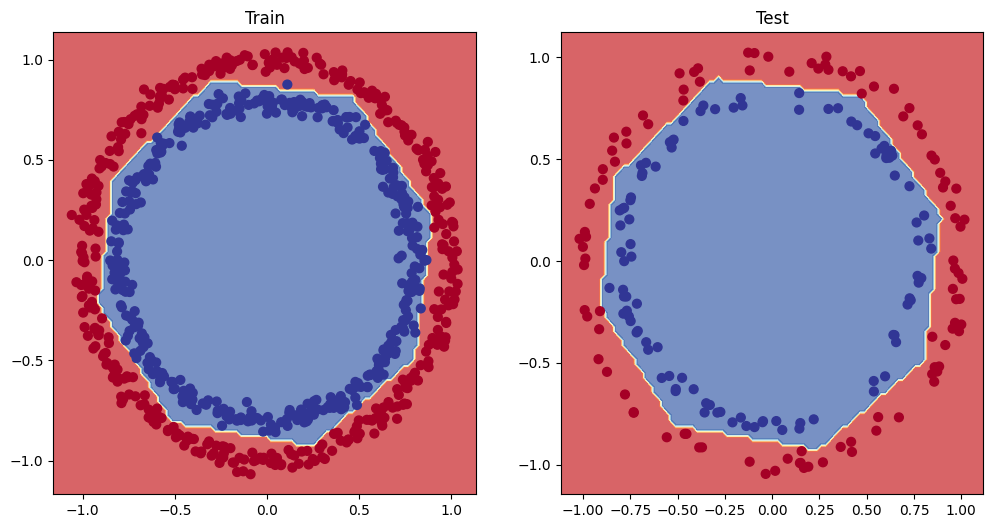

In [48]:
# Plot the decision boundaries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show();